# Phân tích dữ liệu thời thiết
### 1.Dữ liệu và Bài toán
Dữ liệu bao gồm các cột:

- year, month, day, hour_value, minute: Thông tin thời gian (có thể dùng để tạo đặc trưng thời gian hoặc lọc dữ liệu).
- weather: Biến mục tiêu (target) cho bài toán phân loại, có các giá trị như Clear, Cloudy, Rainy, Foggy.
- temperature: Nhiệt độ (độ C).
- wind_speed: Tốc độ gió (km/h).
- wind_angle: Góc gió (độ).
- humidity: Độ ẩm (%).
- pressure: Áp suất khí quyển (hPa).
- visibility: Tầm nhìn (km).

Bài toán phân loại: Dự đoán trạng thái thời tiết (weather) dựa trên các đặc trưng như nhiệt độ, độ ẩm, áp suất, v.v.

Bài toán phân cụm: Nhóm các quan sát thời tiết thành các cụm dựa trên sự tương đồng của các đặc trưng, không sử dụng nhãn weather.

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Thống kê mô tả dữ liệu


In [97]:
df = pd.read_csv('Clean_data/clean_data_train.csv')
print(df.describe())

               year         month           day    hour_value        minute  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean    2020.944140      6.492306     15.742745     11.564238     15.051215   
std        1.410013      3.448729      8.797215      6.946748     15.000004   
min     2019.000000      1.000000      1.000000      0.000000      0.000000   
25%     2020.000000      4.000000      8.000000      5.000000      0.000000   
50%     2021.000000      6.000000     16.000000     12.000000     30.000000   
75%     2022.000000      9.000000     23.000000     18.000000     30.000000   
max     2023.000000     12.000000     31.000000     23.000000     30.000000   

        temperature    wind_speed    wind_angle      humidity      pressure  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean      26.940457      7.795118    135.532875     77.711150   1010.667130   
std        4.110240      5.627292    115.138290    

weather
Clear     59321
Cloudy    11932
Rainy      8099
Foggy      1761
Stormy      895
Name: count, dtype: int64


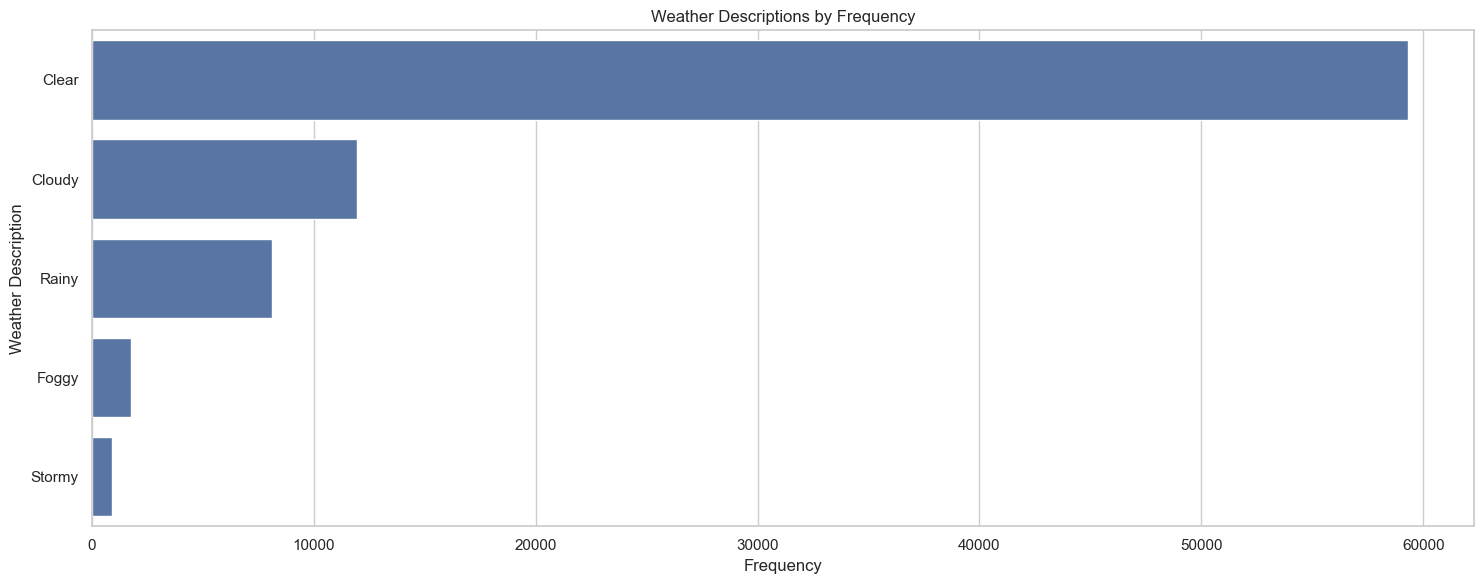

In [98]:
print(df['weather'].value_counts())

# Vẽ biểu đồ tần suất cho các giá trị weather
plt.figure(figsize=(15, 6))
weather_counts = df['weather'].value_counts().head(20)
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Weather Descriptions by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Weather Description')
plt.tight_layout()
plt.show()

## 2. Phân tích dữ liệu và lựa chọn đặc trưng

### 2.1 Tương quan giữa các đặc trưng số:

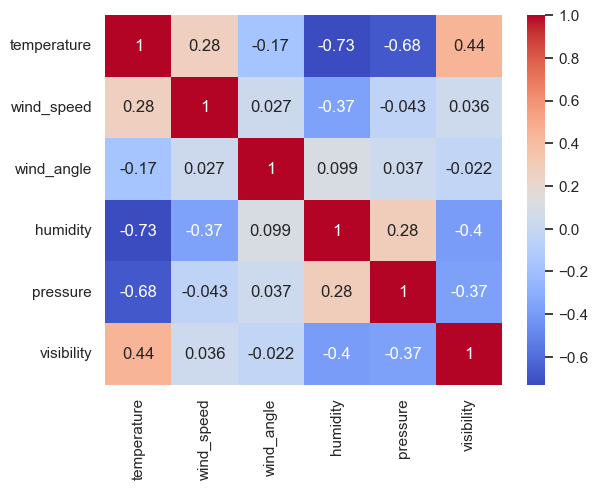

In [99]:
# Tính ma trận tương quan
corr_matrix = df[['temperature', 'wind_speed', 'wind_angle', 'humidity', 'pressure', 'visibility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Không có đặc trưng nào có tương quan cao với nhau, chưa cần loại bỏ đặc trưng.

#### Phân tích mối quan hệ giữa các đặc trưng theo weather

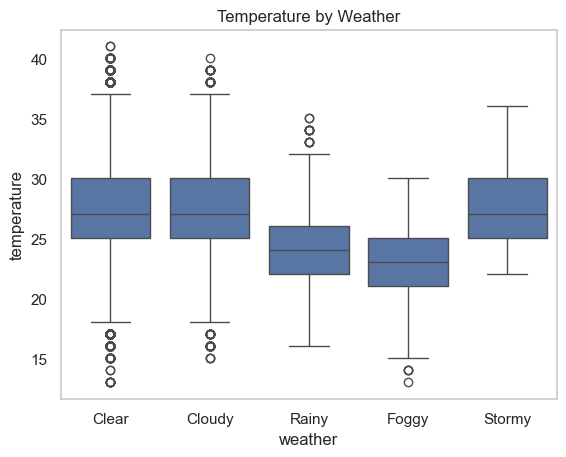

In [100]:
# Boxplot: temperature by Weather
sns.boxplot(x='weather', y='temperature', data=df)
plt.title('Temperature by Weather')
plt.grid(False)
plt.show()


1. Temperature by Weather

    Nhận xét:
    - Nhiệt độ trung bình (median) dao động trong khoảng 25-30°C cho tất cả các loại thời tiết, không có sự khác biệt lớn giữa các lớp (Clear, Cloudy, Rainy, Foggy, Stormy).
    - Phân bố nhiệt độ khá tương đồng giữa các loại thời tiết, với IQR (khoảng tứ phân vị) gần giống nhau.
    - Có một số giá trị ngoại lai (outliers) ở cả năm loại thời tiết, đặc biệt ở Clear và Cloudy (nhiệt độ trên 35°C và dưới 20°C).

    Kết luận:
    - Temperature có sự khác biệt rõ ràng giữa các loại thời tiết nhưng khoảng các nhiệt độ lại thấp, nên có thể là đặc trưng không mạnh cho bài toán phân loại.
    - Nhiệt độ có thể hữu ích trong bài toán phân cụm, vì nó phản ánh một đặc tính vật lý quan trọng của thời tiết.

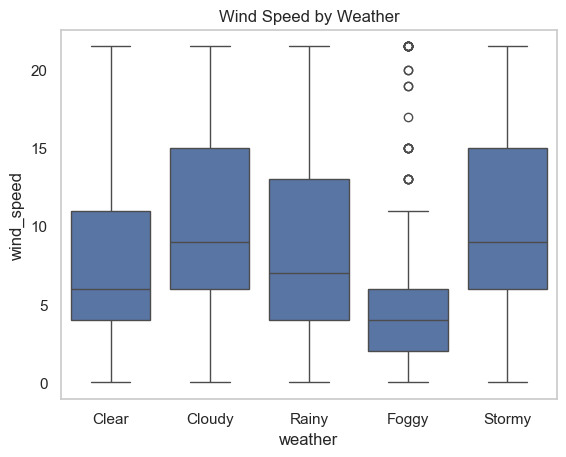

In [101]:
# Boxplot: wind_speed by Weather
sns.boxplot(x='weather', y='wind_speed', data=df)
plt.title('Wind Speed by Weather')
plt.grid(False)
plt.show()


2. Wind Speed by Weather

    Nhận xét:
    - Tốc độ gió trung bình (median) dao động từ 5-15 km/h, nhưng có sự khác biệt đáng chú ý:
    - Rainy có tốc độ gió cao nhất, với nhiều giá trị ngoại lai vượt trên 50 km/h (cao nhất lên tới 70 km/h).
    - Foggy có tốc độ gió thấp nhất, hầu hết dưới 10 km/h.
    - Clear, Cloudy, và Stormy có phân bố khá tương đồng, dao động trong khoảng 5-20 km/h.
    - Rainy có nhiều giá trị ngoại lai lớn, cho thấy tốc độ gió cao bất thường trong điều kiện mưa.
    
    Kết luận:
    - Wind_speed là một đặc trưng quan trọng cho bài toán phân loại, vì nó có sự khác biệt rõ ràng giữa các loại thời tiết, đặc biệt là Rainy và Foggy.

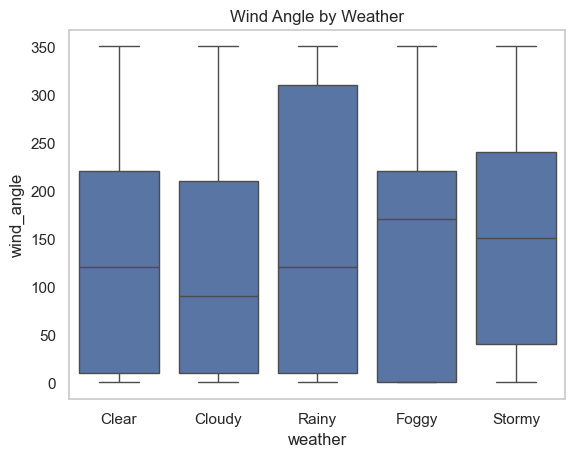

In [102]:
# Boxplot: wind_angle by Weather
sns.boxplot(x='weather', y='wind_angle', data=df)
plt.title('Wind Angle by Weather')
plt.grid(False)
plt.show()


3. Wind Angle by Weather

    Nhận xét:
    - Góc gió trung bình dao động từ 150-250 độ, nhưng không có sự khác biệt rõ ràng giữa các loại thời tiết.
    - Rainy có phân bố rộng hơn (IQR lớn hơn), dao động từ khoảng 100 đến 300 độ, nhưng các loại thời tiết khác (Clear, Cloudy, Foggy, Stormy) có phân bố khá đồng đều.
    - Không có giá trị ngoại lai đáng chú ý. 
    
    Kết luận:
    - Wind_angle không cho thấy sự phân biệt mạnh giữa các loại thời tiết, nên có thể không hữu ích cho bài toán phân loại.
    Trong bài toán phân cụm, đặc trưng này có thể được giữ lại nếu bạn muốn phân cụm dựa trên hướng gió, nhưng cần kết hợp với các đặc trưng khác (như wind_speed) để có ý nghĩa.

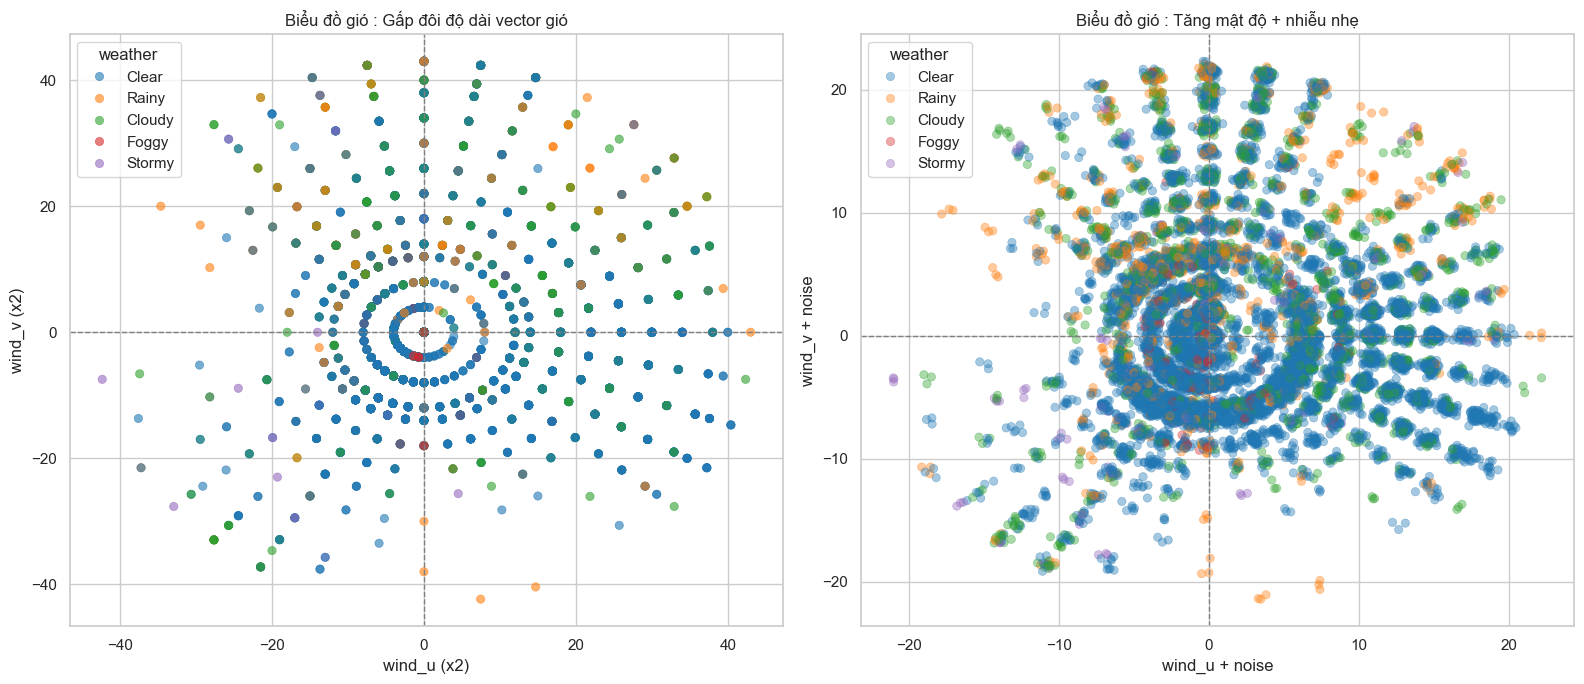

In [103]:
# Select relevant columns
cols_to_plot = ['wind_u', 'wind_v', 'weather']
df_plot = df[cols_to_plot].copy()

# Sample for visualization consistency
df_sampled = df_plot.sample(5000, random_state=42)

# --------- Cách 2: Nhân giá trị wind_u, wind_v lên (giãn ra) ----------
df_scaled = df_sampled.copy()
df_scaled['wind_u'] *= 2
df_scaled['wind_v'] *= 2

# --------- Cách 3: Nhân bản dữ liệu (tăng mật độ) + thêm nhiễu nhỏ ----------
df_augmented = pd.concat([df_sampled]*3, ignore_index=True)
noise = np.random.normal(loc=0, scale=0.3, size=df_augmented[['wind_u', 'wind_v']].shape)
df_augmented[['wind_u', 'wind_v']] += noise

# --------- Plot cả 2 biểu đồ để so sánh ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Biểu đồ với vector giãn ra
sns.scatterplot(
    data=df_scaled, x='wind_u', y='wind_v', hue='weather', alpha=0.6,
    palette='tab10', edgecolor=None, ax=axes[0]
)
axes[0].axhline(0, color='gray', linestyle='--', lw=1)
axes[0].axvline(0, color='gray', linestyle='--', lw=1)
axes[0].set_title("Biểu đồ gió : Gấp đôi độ dài vector gió")
axes[0].set_xlabel("wind_u (x2)")
axes[0].set_ylabel("wind_v (x2)")

# Biểu đồ với dữ liệu nhân bản + nhiễu
sns.scatterplot(
    data=df_augmented, x='wind_u', y='wind_v', hue='weather', alpha=0.4,
    palette='tab10', edgecolor=None, ax=axes[1]
)
axes[1].axhline(0, color='gray', linestyle='--', lw=1)
axes[1].axvline(0, color='gray', linestyle='--', lw=1)
axes[1].set_title("Biểu đồ gió : Tăng mật độ + nhiễu nhẹ")
axes[1].set_xlabel("wind_u + noise")
axes[1].set_ylabel("wind_v + noise")

plt.tight_layout()
plt.show()

In [104]:
print(df['weather'].value_counts())


weather
Clear     59321
Cloudy    11932
Rainy      8099
Foggy      1761
Stormy      895
Name: count, dtype: int64


| Loại thời tiết     | Đặc điểm vector gió dễ thấy                                                | Hướng gió đặc trưng (xấp xỉ)           |
|--------------------|-----------------------------------------------------------------------------|----------------------------------------|
| ☀️ Clear           | Các điểm tập trung gần gốc tọa độ, hướng gió yếu, phân bố đều các hướng     | Không rõ ràng, hướng phân tán          |
| 🌧️ Rain           | Vector dài hơn, lệch rõ rệt về một hướng (ví dụ: u âm, v dương → Tây Nam)   | Tây Nam hoặc Đông Bắc                  |
| 🌫️ Fog            | Gió yếu, gần tâm, nhưng có xu hướng lệch về một góc cụ thể                  | Hướng nhẹ, có thể Bắc hoặc Tây Bắc     |
| 🌩️ Thunderstorms  | Các điểm thường có độ dài lớn (gió mạnh), hướng khá nhất quán               | Thường lệch về 1–2 góc cụ thể          |
| ☁️ Cloudy          | Phân tán đều, nhưng vẫn có mật độ lệch nhẹ về các vùng có gió trung bình    | Hơi nghiêng về Tây hoặc Đông           |


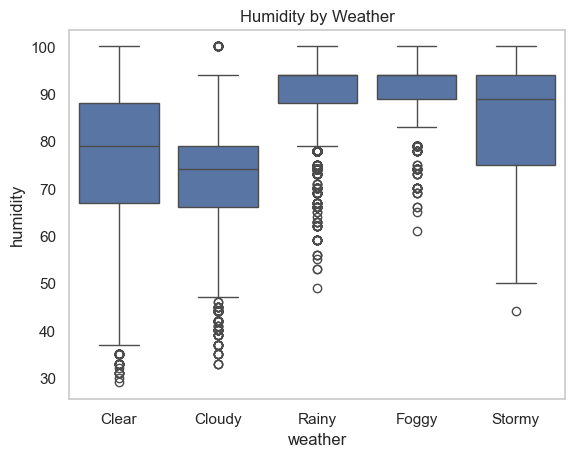

In [105]:
# Boxplot: humidity by Weather
sns.boxplot(x='weather', y='humidity', data=df)
plt.title('Humidity by Weather')
plt.grid(False)
plt.show()


4. Humidity by Weather

    Nhận xét:
    - Độ ẩm trung bình có sự khác biệt rõ rệt giữa các loại thời tiết:
    - Foggy và Rainy có độ ẩm cao nhất, trung bình khoảng 90-100%, với ít giá trị ngoại lai.
    - Clear và Cloudy có độ ẩm thấp hơn, trung bình khoảng 70-80%.
    - Stormy nằm ở giữa, với độ ẩm trung bình khoảng 80-90%.
    - Phân bố độ ẩm của Foggy và Rainy rất tập trung (IQR hẹp), trong khi Clear và Cloudy có phân bố rộng hơn.
    
    Kết luận:
    - Humidity là một đặc trưng rất quan trọng cho bài toán phân loại, vì nó phân biệt rõ ràng giữa các loại thời tiết (đặc biệt là Foggy/Rainy với Clear/Cloudy).
    - Trong bài toán phân cụm, độ ẩm cũng sẽ đóng vai trò lớn trong việc hình thành các cụm (ví dụ: cụm thời tiết "ẩm ướt" như Foggy và Rainy, và cụm "khô" như Clear).

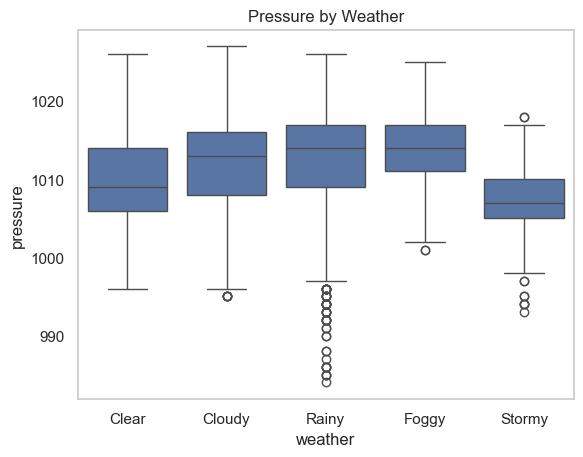

In [106]:
# Boxplot: pressure by Weather
sns.boxplot(x='weather', y='pressure', data=df)
plt.title('Pressure by Weather')
plt.grid(False)
plt.show()


5. Pressure by Weather

    Nhận xét:
    - Áp suất trung bình dao động từ 1000-1020 hPa, nhưng có sự khác biệt giữa các loại thời tiết:
    - Clear và Cloudy có áp suất cao hơn, trung bình khoảng 1010-1020 hPa.
    - Rainy, Foggy, và Stormy có áp suất thấp hơn, trung bình khoảng 1000-1010 hPa.
    - Phân bố áp suất của Rainy, Foggy, và Stormy có nhiều giá trị ngoại lai thấp (dưới 990 hPa), cho thấy áp suất giảm mạnh trong các điều kiện thời tiết xấu.
    
    Kết luận:
    - Pressure là một đặc trưng quan trọng cho bài toán phân loại, vì áp suất thấp thường liên quan đến thời tiết xấu (Rainy, Foggy, Stormy), trong khi áp suất cao liên quan đến thời tiết tốt (Clear, Cloudy).
    - Đặc trưng này cũng hữu ích cho bài toán phân cụm, vì nó có thể giúp phân biệt các cụm thời tiết "ổn định" (áp suất cao) và "bất ổn" (áp suất thấp).

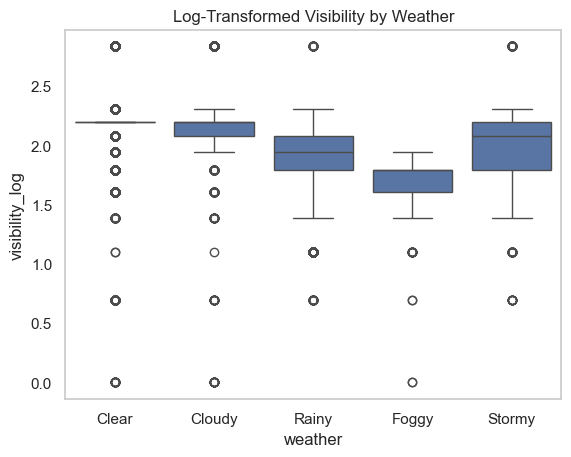

In [107]:
# Boxplot: visibility by Weather
sns.boxplot(x='weather', y='visibility_log', data=df)
plt.title('Log-Transformed Visibility by Weather')
plt.grid(False)
plt.show()

6. Visibility by Weather

    Nhận xét:
    - Tầm nhìn có sự khác biệt rất rõ rệt giữa các loại thời tiết:
    - Clear có tầm nhìn cao nhất, trung bình khoảng 10-15 km.
    - Cloudy thấp hơn một chút, trung bình khoảng 8-12 km.
    - Rainy, Foggy, và Stormy có tầm nhìn rất thấp, trung bình dưới 5 km, đặc biệt Foggy có tầm nhìn thấp nhất (thường dưới 2 km).
    - Phân bố của Foggy rất tập trung (IQR rất hẹp), trong khi Clear và Cloudy có phân bố rộng hơn.
    
    Kết luận:
    - Visibility là một đặc trưng cực kỳ quan trọng cho bài toán phân loại, vì nó phân biệt rõ ràng giữa các loại thời tiết (đặc biệt là Foggy với các loại khác).
    - Trong bài toán phân cụm, tầm nhìn sẽ giúp hình thành các cụm thời tiết "tầm nhìn thấp" (Foggy, Rainy, Stormy) và "tầm nhìn cao" (Clear, Cloudy).

Cho Bài toán Phân loại

- Đặc trưng quan trọng (nên giữ lại):
    - Humidity: Phân biệt rõ ràng giữa thời tiết ẩm (Foggy, Rainy) và khô (Clear, Cloudy).
    - Visibility: Phân biệt mạnh mẽ giữa Foggy và các loại thời tiết khác.
    - Pressure: Phân biệt thời tiết ổn định (Clear, Cloudy) và bất ổn (Rainy, Foggy, Stormy).
    - Wind_speed: Phân biệt Rainy (gió mạnh) và Foggy (gió yếu).
- Đặc trưng ít quan trọng (có thể loại bỏ):
    - Temperature: Không có sự khác biệt rõ ràng giữa các loại thời tiết.
    - Wind_angle: Phân bố không khác biệt nhiều giữa các loại thời tiết.

Cho Bài toán Phân cụm

- Đặc trưng nên giữ lại:
    - Humidity, Visibility, Pressure, Wind_speed: Các đặc trưng này có sự khác biệt lớn giữa các loại thời tiết, giúp hình thành các cụm có ý nghĩa.
    - Temperature: Mặc dù không phân biệt rõ cho phân loại, nhưng vẫn có thể đóng vai trò trong phân cụm (ví dụ: cụm thời tiết "nóng" hoặc "lạnh").
    - Wind_angle: Có thể giữ lại nếu bạn muốn phân cụm dựa trên hướng gió, nhưng cần kết hợp với wind_speed.


### 2.2 Phân tích đặc trưng thời gian

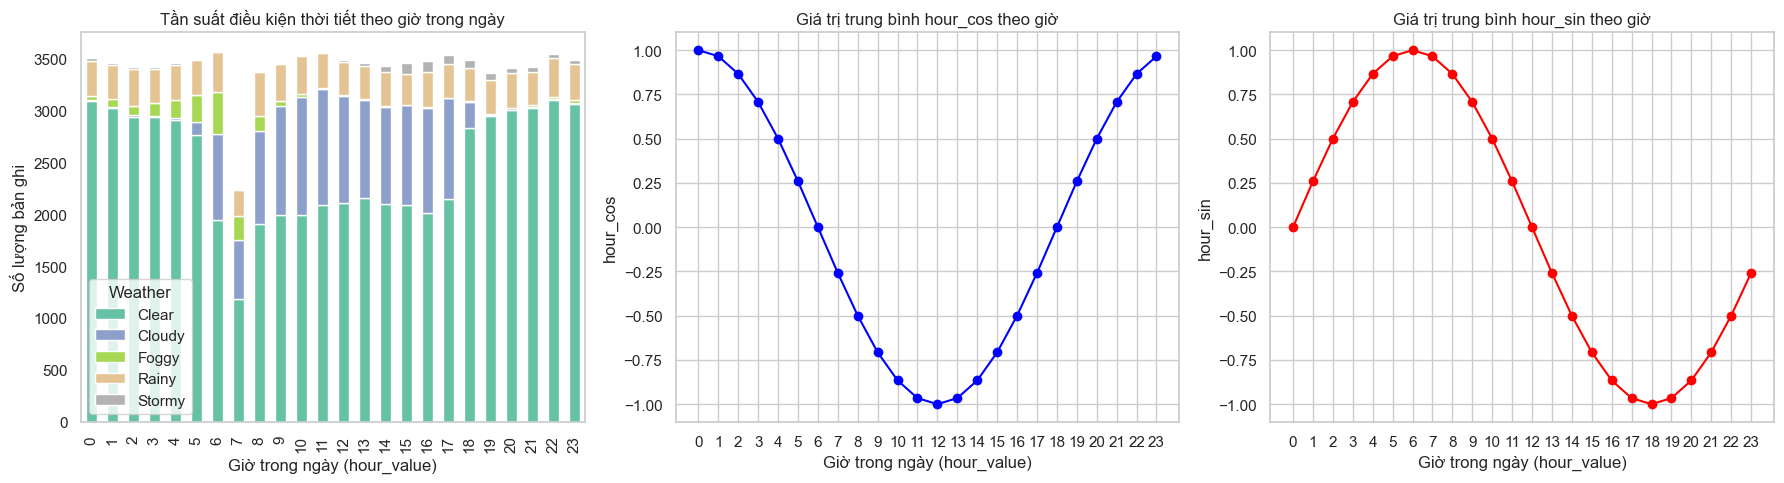

In [108]:
# Tạo cột thời gian đầy đủ (nếu cần)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour_value', 'minute']].rename(columns={'hour_value': 'hour', 'minute': 'minute'}))

# Đếm tần suất điều kiện thời tiết theo giờ
weather_by_hour = df.groupby(['hour_value', 'weather']).size().unstack(fill_value=0)


plt.figure(figsize=(18, 5))

# 1. Biểu đồ cột xếp chồng tần suất weather theo hour_value
plt.subplot(1, 3, 1)
weather_by_hour.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Tần suất điều kiện thời tiết theo giờ trong ngày')
plt.xlabel('Giờ trong ngày (hour_value)')
plt.ylabel('Số lượng bản ghi')
plt.legend(title='Weather')
plt.grid(False)

# 2. Biểu đồ trung bình hour_cos theo hour_value
plt.subplot(1, 3, 2)
mean_hour_cos = df.groupby('hour_value')['hour_cos'].mean()
plt.plot(mean_hour_cos.index, mean_hour_cos.values, marker='o', color='blue')
plt.title('Giá trị trung bình hour_cos theo giờ')
plt.xlabel('Giờ trong ngày (hour_value)')
plt.ylabel('hour_cos')
plt.xticks(mean_hour_cos.index)
plt.grid(True)

# 3. Biểu đồ trung bình hour_sin theo hour_value
plt.subplot(1, 3, 3)
mean_hour_sin = df.groupby('hour_value')['hour_sin'].mean()
plt.plot(mean_hour_sin.index, mean_hour_sin.values, marker='o', color='red')
plt.title('Giá trị trung bình hour_sin theo giờ')
plt.xlabel('Giờ trong ngày (hour_value)')
plt.ylabel('hour_sin')
plt.xticks(mean_hour_sin.index)
plt.grid(True)

plt.tight_layout()
plt.show()

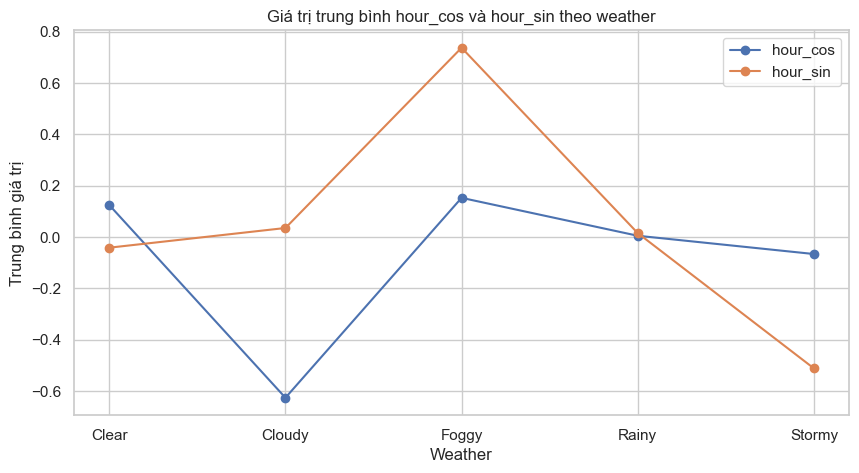

In [109]:
# Tính trung bình cos, sin theo weather
mean_cos = df.groupby('weather')['hour_cos'].mean()
mean_sin = df.groupby('weather')['hour_sin'].mean()

plt.figure(figsize=(10,5))

plt.plot(mean_cos.index, mean_cos.values, marker='o', label='hour_cos')
plt.plot(mean_sin.index, mean_sin.values, marker='o', label='hour_sin')

plt.title('Giá trị trung bình hour_cos và hour_sin theo weather')
plt.xlabel('Weather')
plt.ylabel('Trung bình giá trị')
plt.legend()
plt.grid(True)
plt.show()

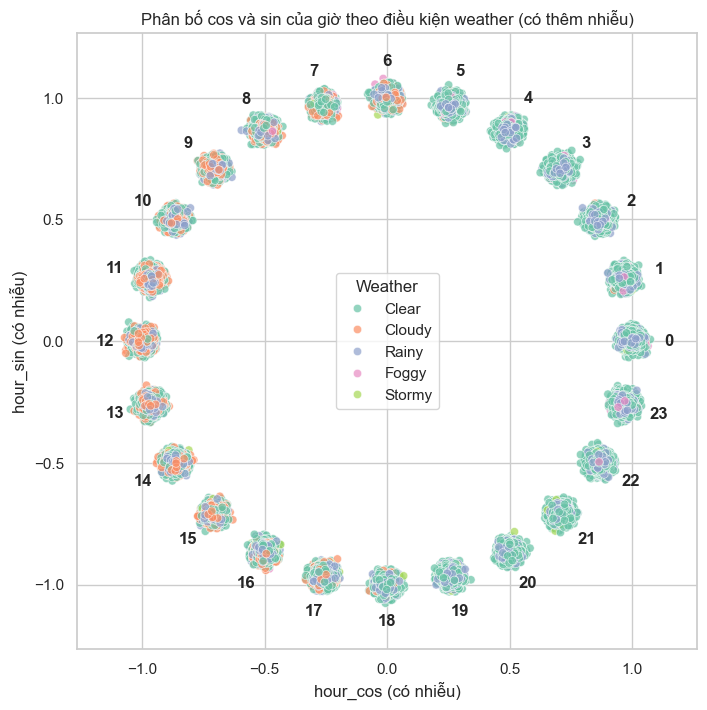

In [125]:
# Tạo bản copy dữ liệu để thêm noise
df_jitter = df.copy()

# Thêm nhiễu nhỏ vào hour_cos và hour_sin (ví dụ Gaussian noise với độ lệch chuẩn 0.02)
noise_level = 0.02
df_jitter['hour_cos_jitter'] = df_jitter['hour_cos'] + np.random.normal(0, noise_level, size=len(df_jitter))
df_jitter['hour_sin_jitter'] = df_jitter['hour_sin'] + np.random.normal(0, noise_level, size=len(df_jitter))

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_jitter, x='hour_cos_jitter', y='hour_sin_jitter', 
                     hue='weather', palette='Set2', alpha=0.7)

plt.title('Phân bố cos và sin của giờ theo điều kiện weather (có thêm nhiễu)')
plt.xlabel('hour_cos (có nhiễu)')
plt.ylabel('hour_sin (có nhiễu)')

# Tính trung bình cos, sin mỗi giờ
grouped = df_jitter.groupby('hour_value')[['hour_cos_jitter', 'hour_sin_jitter']].mean().reset_index()

# Tính góc trung bình của giờ
angles = np.arctan2(grouped['hour_sin_jitter'], grouped['hour_cos_jitter'])

# Bán kính vòng tròn lớn hơn cụm điểm, ví dụ 1.3
radius = 1.15

# Tọa độ vòng tròn ngoài cùng
circle_x = radius * np.cos(angles)
circle_y = radius * np.sin(angles)

# Vẽ vòng tròn lớn (marker 'o', size lớn, viền màu đen, không tô màu)
plt.scatter(circle_x, circle_y, s=600, facecolors='none', linewidths=1.5)

# In giờ ở giữa vòng tròn
for i, hour in enumerate(grouped['hour_value']):
    plt.text(circle_x[i], circle_y[i], str(int(hour)),
             fontsize=12, fontweight='bold', ha='center', va='center')

plt.legend(title='Weather')
plt.show()


1. Phân bố tổng thể
    - Điều kiện Clear (màu xanh lá) chiếm tỷ lệ lớn nhất ở hầu hết các giờ, cho thấy thời tiết trong lành là phổ biến nhất trong ngày.
    - Cloudy (màu xanh dương) và Rainy (màu cam) cũng xuất hiện đáng kể, nhưng ít hơn Clear.
    - Foggy (màu vàng) và Stormy (màu xám) có tần suất thấp, với Stormy rất hiếm.
2. Xu hướng theo giờ
    - Ban đêm và sáng sớm (0h-7h):

        Clear vẫn chiếm ưu thế, nhưng Foggy xuất hiện nhiều hơn, đặc biệt vào khoảng 4h-7h, có thể do sương mù thường xuất hiện vào sáng sớm.
        Rainy cũng tăng nhẹ vào khoảng 5h-7h, cho thấy khả năng có mưa nhỏ vào thời điểm này.

    - Buổi sáng (8h-11h):

        Clear tiếp tục chiếm đa số, nhưng Cloudy tăng lên, cho thấy trời có thể nhiều mây hơn vào buổi sáng.
        Rainy giảm dần, ít xuất hiện hơn so với sáng sớm.

    - Buổi trưa và chiều (12h-17h):

        Đây là thời điểm Clear đạt tỷ lệ cao nhất, với ít Rainy và Foggy, cho thấy thời tiết ổn định, trời quang vào giữa ngày.
        Cloudy vẫn có mặt nhưng không quá nổi bật.

    - Buổi tối (18h-23h):

        Clear vẫn chiếm ưu thế, nhưng Cloudy và Rainy tăng nhẹ, đặc biệt vào khoảng 19h-22h, có thể do thời tiết thay đổi vào buổi tối.
        Foggy tăng nhẹ vào 22h-23h, có thể liên quan đến độ ẩm tăng vào ban đêm.
3. Kết luận
- Thời tiết ổn định vào giữa ngày: Thời gian từ 12h-17h có tỷ lệ Clear cao nhất, phù hợp với thời tiết nắng và ổn định.
- Sáng sớm và tối muộn có biến động: Foggy và Rainy xuất hiện nhiều hơn vào 4h-7h và 19h-23h, cho thấy thời tiết dễ thay đổi vào các khung giờ này.
- Đặc trưng giờ rất quan trọng: Sự thay đổi rõ rệt của các điều kiện thời tiết theo giờ cho thấy đặc trưng hour_value rất cần thiết cho mô hình dự đoán thời tiết, đặc biệt nếu cần dự đoán weather, temperature, hoặc humidity. Nên xử lý đặc trưng này (ví dụ: mã hóa chu kỳ bằng sin/cos) để mô hình học tốt hơn.

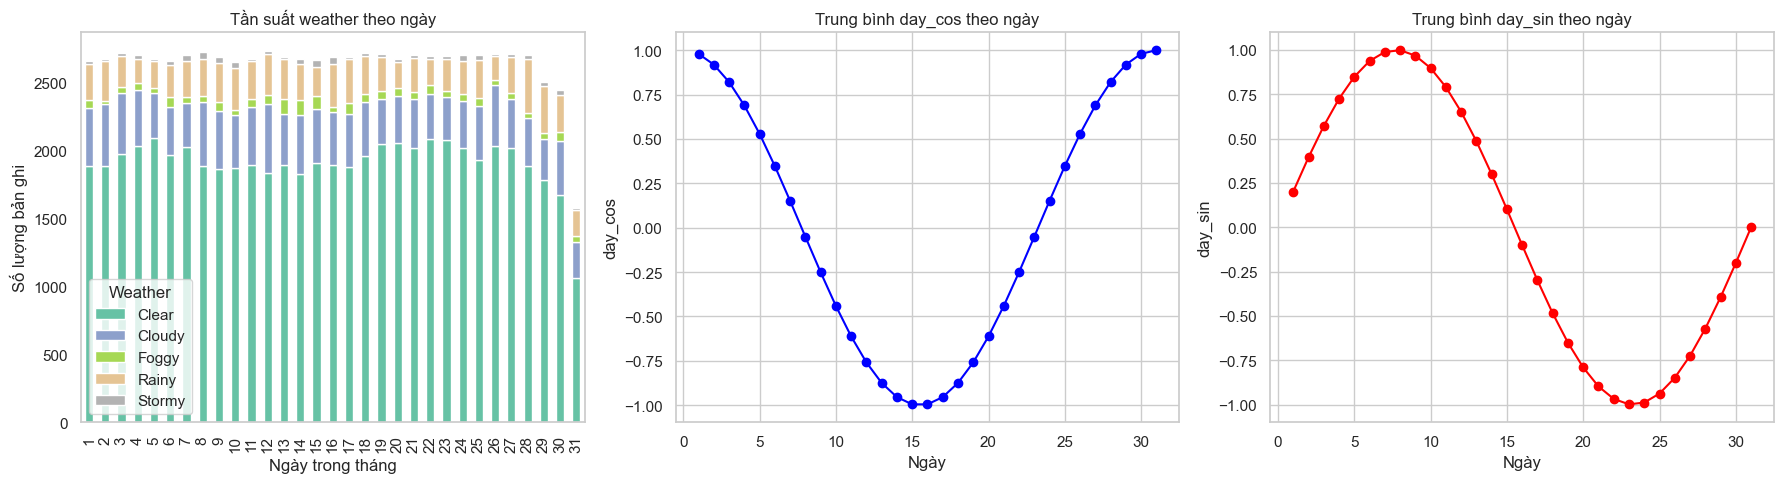

In [111]:
# Tần suất weather theo day
weather_by_day = df.groupby(['day', 'weather']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 5))

# Biểu đồ cột xếp chồng weather
plt.subplot(1, 3, 1)
weather_by_day.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Tần suất weather theo ngày')
plt.xlabel('Ngày trong tháng')
plt.ylabel('Số lượng bản ghi')
plt.grid(False)
plt.legend(title='Weather')

# Trung bình day_cos theo ngày
plt.subplot(1, 3, 2)
mean_day_cos = df.groupby('day')['day_cos'].mean()
plt.plot(mean_day_cos.index, mean_day_cos.values, marker='o', color='blue')
plt.title('Trung bình day_cos theo ngày')
plt.xlabel('Ngày')
plt.ylabel('day_cos')
plt.grid(True)

# Trung bình day_sin theo ngày
plt.subplot(1, 3, 3)
mean_day_sin = df.groupby('day')['day_sin'].mean()
plt.plot(mean_day_sin.index, mean_day_sin.values, marker='o', color='red')
plt.title('Trung bình day_sin theo ngày')
plt.xlabel('Ngày')
plt.ylabel('day_sin')
plt.grid(True)

plt.tight_layout()
plt.show()


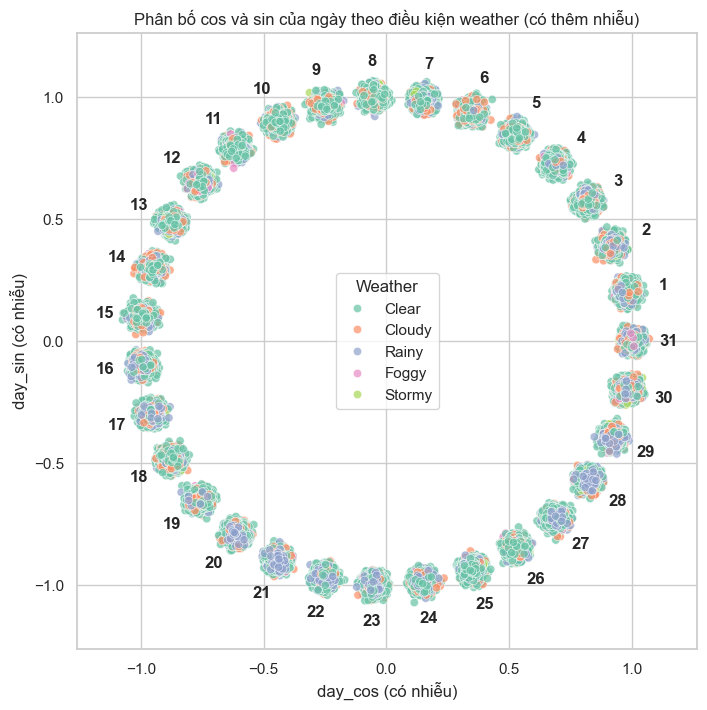

In [122]:
# Thêm noise như trước
df_jitter = df.copy()
noise_level = 0.02
df_jitter['day_cos_jitter'] = df_jitter['day_cos'] + np.random.normal(0, noise_level, size=len(df_jitter))
df_jitter['day_sin_jitter'] = df_jitter['day_sin'] + np.random.normal(0, noise_level, size=len(df_jitter))

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_jitter, x='day_cos_jitter', y='day_sin_jitter', 
                     hue='weather', palette='Set2', alpha=0.7)

plt.title('Phân bố cos và sin của ngày theo điều kiện weather (có thêm nhiễu)')
plt.xlabel('day_cos (có nhiễu)')
plt.ylabel('day_sin (có nhiễu)')

# Tính trung bình cos, sin mỗi ngày
grouped = df_jitter.groupby('day')[['day_cos_jitter', 'day_sin_jitter']].mean().reset_index()

# Tính góc trung bình của ngày
angles = np.arctan2(grouped['day_sin_jitter'], grouped['day_cos_jitter'])

# Bán kính vòng tròn lớn hơn cụm điểm, ví dụ 1.2
radius = 1.15

# Tọa độ vòng tròn ngoài cùng
circle_x = radius * np.cos(angles)
circle_y = radius * np.sin(angles)

# Vẽ vòng tròn lớn (marker 'o', size lớn, viền màu đen, không tô màu)
plt.scatter(circle_x, circle_y, s=600, facecolors='none', linewidths=1.5)

# In ngày ở giữa vòng tròn
for i, day in enumerate(grouped['day']):
    plt.text(circle_x[i], circle_y[i], str(int(day)),
             fontsize=12, fontweight='bold', ha='center', va='center')

plt.legend(title='Weather')
plt.show()

Nhận xét: 
- Biểu đồ cho thấy điều kiện Clear chiếm ưu thế rõ rệt trong hầu hết các ngày trong tháng, với sự hiện diện đáng kể của Cloudy và Rainy, trong khi Foggy và Stormy rất hiếm. Tần suất các điều kiện thời tiết khá đồng đều giữa các ngày, với một số biến động nhỏ, đặc biệt ngày 31 có số lượng bản ghi giảm, có thể do dữ liệu thiếu hụt.
- Biểu đồ theo ngày cho thấy phân bố thời tiết khá đồng đều, nhưng vẫn có biến động nhỏ, cho thấy day có thể bổ sung thông tin chi tiết hơn.

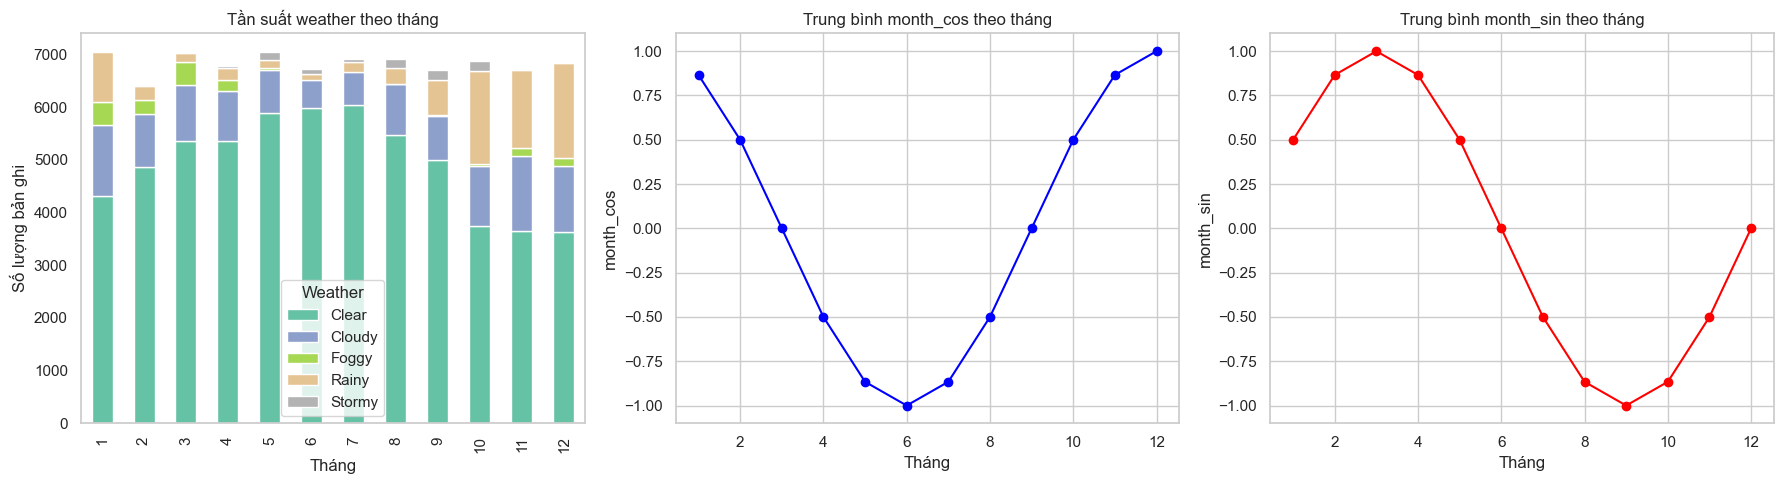

In [93]:
# Tần suất weather theo month
weather_by_month = df.groupby(['month', 'weather']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 5))

# Biểu đồ cột xếp chồng weather
plt.subplot(1, 3, 1)
weather_by_month.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Tần suất weather theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng bản ghi')
plt.grid(False)
plt.legend(title='Weather')

# Trung bình month_cos theo tháng
plt.subplot(1, 3, 2)
mean_month_cos = df.groupby('month')['month_cos'].mean()
plt.plot(mean_month_cos.index, mean_month_cos.values, marker='o', color='blue')
plt.title('Trung bình month_cos theo tháng')
plt.xlabel('Tháng')
plt.ylabel('month_cos')
plt.grid(True)

# Trung bình month_sin theo tháng
plt.subplot(1, 3, 3)
mean_month_sin = df.groupby('month')['month_sin'].mean()
plt.plot(mean_month_sin.index, mean_month_sin.values, marker='o', color='red')
plt.title('Trung bình month_sin theo tháng')
plt.xlabel('Tháng')
plt.ylabel('month_sin')
plt.grid(True)

plt.tight_layout()
plt.show()


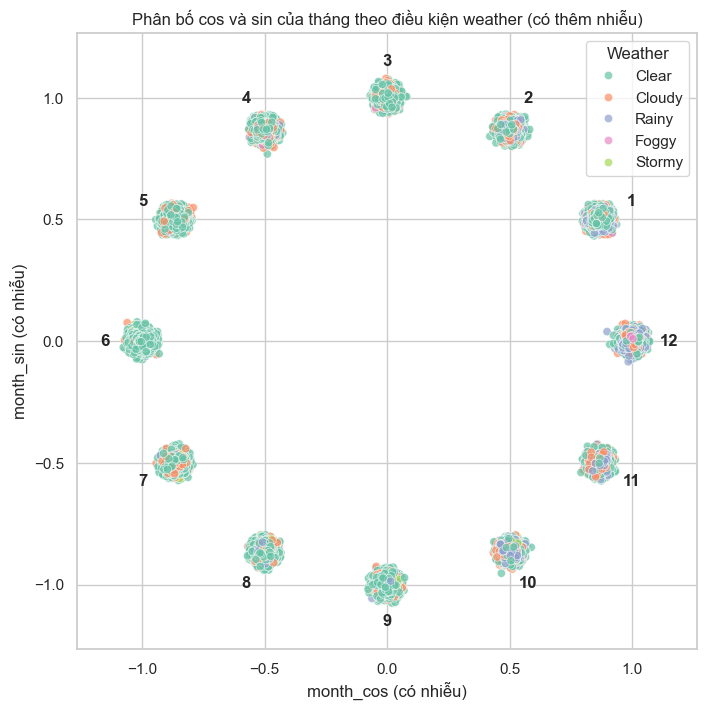

In [123]:
# Tạo bản copy dữ liệu để thêm noise
df_jitter = df.copy()

# Thêm nhiễu nhỏ vào month_cos và month_sin
noise_level = 0.02
df_jitter['month_cos_jitter'] = df_jitter['month_cos'] + np.random.normal(0, noise_level, size=len(df_jitter))
df_jitter['month_sin_jitter'] = df_jitter['month_sin'] + np.random.normal(0, noise_level, size=len(df_jitter))

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_jitter, x='month_cos_jitter', y='month_sin_jitter', 
                     hue='weather', palette='Set2', alpha=0.7)

plt.title('Phân bố cos và sin của tháng theo điều kiện weather (có thêm nhiễu)')
plt.xlabel('month_cos (có nhiễu)')
plt.ylabel('month_sin (có nhiễu)')

# Tính trung bình cos, sin mỗi tháng
grouped = df_jitter.groupby('month')[['month_cos_jitter', 'month_sin_jitter']].mean().reset_index()

# Tính góc trung bình của tháng
angles = np.arctan2(grouped['month_sin_jitter'], grouped['month_cos_jitter'])

# Bán kính vòng tròn lớn hơn cụm điểm, ví dụ 1.3
radius = 1.15

# Tọa độ vòng tròn ngoài cùng
circle_x = radius * np.cos(angles)
circle_y = radius * np.sin(angles)

# Vẽ vòng tròn lớn (marker 'o', size lớn, viền màu đen, không tô màu)
plt.scatter(circle_x, circle_y, s=600, facecolors='none', linewidths=1.5)

# In tháng ở giữa vòng tròn
for i, month in enumerate(grouped['month']):
    plt.text(circle_x[i], circle_y[i], str(int(month)),
             fontsize=12, fontweight='bold', ha='center', va='center')

plt.legend(title='Weather')
plt.show()


Nhận xét:

- Mối quan hệ với biến mục tiêu: Từ biểu đồ, ta thấy month có ảnh hưởng rõ rệt đến phân bố các điều kiện thời tiết (weather). Điều này cho thấy month là một đặc trưng quan trọng nếu mục tiêu của mô hình là dự đoán weather hoặc các biến thời tiết khác như temperature, humidity.

- Tính chu kỳ: Month thể hiện tính chu kỳ hàng năm của thời tiết (ví dụ: mùa khô, mùa mưa). Nếu không xử lý đặc trưng này, mô hình có thể không nhận ra các mẫu theo mùa, dẫn đến hiệu suất dự đoán kém.

- Biến động theo thời gian: Sự thay đổi trong tần suất của Rainy và Foggy theo tháng cho thấy month mang thông tin giá trị, giúp mô hình học được các xu hướng thời tiết theo mùa.

<Figure size 1200x600 with 0 Axes>

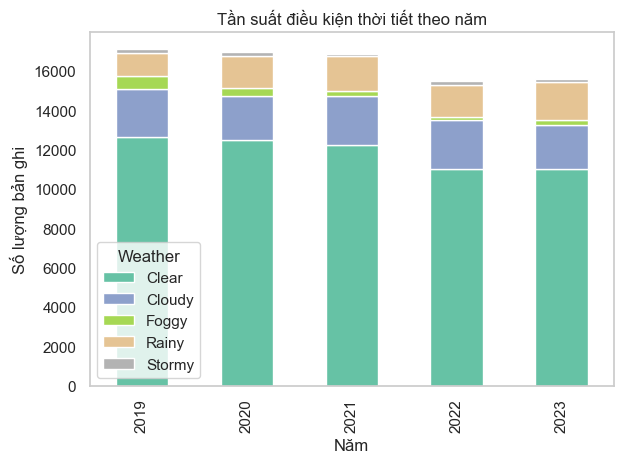

In [55]:
# Đếm tần suất điều kiện thời tiết theo năm
weather_by_year = df.groupby(['year', 'weather']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột xếp chồng
plt.figure(figsize=(12, 6))
weather_by_year.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Tần suất điều kiện thời tiết theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng bản ghi')
plt.legend(title='Weather')
plt.tight_layout()
plt.grid(False)
plt.show()

Nhận xét:

- Mối quan hệ với biến mục tiêu: Từ biểu đồ, ta thấy không có sự khác biệt quá nhiều về thời tiết giữa các năm.

- Biến động theo thời gian: Sự thay đổi trong tần suất của Foggy theo năm rất nhỏ, tuy nhiên có thể mang thông tin giá trị. Biến năm là 1 biến không quá quan trọng cho bài toàn phân loại và phân cụm.

## 3. Kết luận
Dựa trên phân tích, các đặc trưng nên sử dụng:

- Temperature, humidity, pressure, wind_speed, visibility: Có khả năng ảnh hưởng mạnh đến thời tiết.
- Time (từ hour_value): Phản ánh xu hướng thời tiết theo thời gian trong ngày.
- Month: Phản ánh xu hướng thời tiết theo mùa, có thể rút gọn  lại thành 4 mùa để mô hình dễ học hơn
- Day, year: không phải là đặc trưng mạnh